# Natutal Language Processing (NLP) - Sentiment Analysis

## The North Face

VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

Roberta Pretrained Model from 🤗

Huggingface Pipeline

### 1) Read in Data and NLTK Basics

In [12]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=79c369987248a430002ad5b7410c73fab871b3d5b67d222ef1546d4ae3c1de2c
  Stored in directory: c:\users\peini\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
# regular expression
from textblob import TextBlob
from wordcloud import WordCloud
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

pd.set_option("display.max_columns", None)

plt.style.use('ggplot')

In [2]:
# Read in data
df = pd.read_excel('excel_file.xlsx')
print(df.shape)

(3848, 7)


In [3]:
df.head(10)

,name,price,reviewers,dates,ratings,titles,contents
0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,"Reviewed in the United States on June 4, 2023",4.6 out of 5,Worth every penny,This is a must have if you are in a rainy area...
1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,"Reviewed in the United States on April 23, 2023",4.6 out of 5,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,"Reviewed in the United States on June 4, 2023",4.6 out of 5,Muy útil,"Cómoda , resiste el frío y el agua"
3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,"Reviewed in the United States on May 17, 2023",4.6 out of 5,Very Nice,Fits well and great materials and construction
4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,"Reviewed in the United States on May 28, 2023",4.6 out of 5,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,"Reviewed in the United States on May 1, 2023",4.6 out of 5,Garment,Color inside. Pockets
6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,"Reviewed in the United States on April 23, 2023",4.6 out of 5,Keeps me dry.,The jacket looks to be well made and did a gre...
7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,"Reviewed in the United States on June 3, 2023",4.6 out of 5,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,"Reviewed in the United States on February 27, ...",4.6 out of 5,as expected,very lightweight weatherproof shell. the mater...
9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,"Reviewed in the United States on March 18, 2023",4.6 out of 5,It's just a basic windbreaker,You're definitly only paying for the name. The...


In [4]:
df['contents'].values[99]

'Is a great jacket. Exactly what my son wanted'

In [5]:
df['contents'].values[0]

'This is a must have if you are in a rainy area. I will make sure to mention that if you want a more tighter fit to go down a size. I have already used it 3 times under heavy rain and it works great.'

In [6]:
df['contents'].values[3000]

'Comfortable , pretty , good Quality'

### Data Cleaning

In [7]:
import pandas as pd
import numpy as np

def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3848
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name         object
price        object
reviewers    object
dates        object
ratings      object
titles       object
contents     object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
           Missing Values  Ratio
ratings                39   1.01
dates                  57   1.48
titles                 62   1.61
name                   75   1.95
contents               80   2.08
reviewers             207   5.38
price                1448  37.63
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
90
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [0.0, 0.05, 0.5, 0.95, 0.99, 1.0]
Index: []


In [8]:
# Replace missing values with "anonymous" in the entire dataframe
df_filled = df.fillna("anonymous")

# Replace missing values with "anonymous" in a specific column
df['reviewers'] = df['reviewers'].fillna("anonymous")

In [9]:
def remove_repeated_words(dates):
    if isinstance(dates, float):
        return dates
    words = str(dates).split()
    unique_words = []
    for word in words:
        if word != 'Reviewed' and word != 'in' and word != 'the' and word != 'United' and word != 'States' and word != 'on' and word != 'Germany' and word != 'Canada' and word != 'France' and word != 'Italy' and  word != 'Australia' and word != 'Kingdom' and word != 'Japan' and word != 'Singapore' and word != 'Spain' and word != 'Mexico' and word != 'India' and word != 'Brazil' :
            unique_words.append(word)
    return ' '.join(unique_words)

In [10]:
df['dates'] = df['dates'].apply(remove_repeated_words)
df['dates']

0         June 4, 2023
1       April 23, 2023
2         June 4, 2023
3         May 17, 2023
4         May 28, 2023
             ...      
3843               NaN
3844               NaN
3845               NaN
3846      May 25, 2023
3847      May 25, 2023
Name: dates, Length: 3848, dtype: object

In [11]:
# Convert 'Date' column to datetime type
df['dates'] = pd.to_datetime(df['dates'])

# Fill missing values with a specific date
df['dates'] = df['dates'].fillna(method='ffill')

In [12]:
def remove_repeated_words(ratings):
    if isinstance(ratings, float):
        return ratings
    words = str(ratings).split()
    unique_words = []
    for word in words:
        if word != 'out' and word != 'of' and word != '5' :
            unique_words.append(word)
    return ' '.join(unique_words)

In [13]:
df['ratings'] = df['ratings'].apply(remove_repeated_words)
df['ratings']

0       4.6
1       4.6
2       4.6
3       4.6
4       4.6
       ... 
3843    5.0
3844    5.0
3845    NaN
3846    5.0
3847    5.0
Name: ratings, Length: 3848, dtype: object

In [14]:
# Clean the 'ratings' column
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
# Convert the 'ratings' column to float
df['ratings'] = df['ratings'].astype(float)

In [15]:
# Calculate the mean rating
mean_rating = df['ratings'].mean()

# Fill missing values with the mean rating
df['ratings'] = df['ratings'].fillna(mean_rating)

In [16]:
df['price']

0       $109.85 -\n$109.95
1       $109.85 -\n$109.95
2       $109.85 -\n$109.95
3       $109.85 -\n$109.95
4       $109.85 -\n$109.95
               ...        
3843                $29.95
3844                $29.95
3845                $34.95
3846                $34.95
3847                $34.95
Name: price, Length: 3848, dtype: object

In [17]:
df_filled = df.fillna("price")

df['price'] = df['price'].fillna(method='bfill')

In [18]:
df_filled = df.fillna("name")

df['name'] = df['name'].fillna(method='ffill')

In [19]:
df = df.dropna()

In [20]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3765
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name                 object
price                object
reviewers            object
dates        datetime64[ns]
ratings             float64
titles               object
contents             object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
80
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         0.00  0.05  0.50  0.95  0.99  1.00
ratings   4.0   4.3   4.6   4.7   4.7   5.0


In [21]:
df_no_duplicates = df.drop_duplicates()

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3685
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name                 object
price                object
reviewers            object
dates        datetime64[ns]
ratings             float64
titles               object
contents             object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         0.00  0.05  0.50  0.95  0.99  1.00
ratings   4.0   4.4   4.6   4.7   4.7   5.0


In [24]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                              'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,contents,2526
1,reviewers,2234
2,titles,1702
3,dates,1324
4,name,61
5,price,37
6,ratings,11


In [25]:
df.head(10)

,name,price,reviewers,dates,ratings,titles,contents
0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,2023-02-27,4.6,as expected,very lightweight weatherproof shell. the mater...
9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...


In [26]:
df = df.reset_index()

In [27]:
df.head(10)

,index,name,price,reviewers,dates,ratings,titles,contents
0,0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
6,6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
7,7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,2023-02-27,4.6,as expected,very lightweight weatherproof shell. the mater...
9,9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...


### EDA Analysis

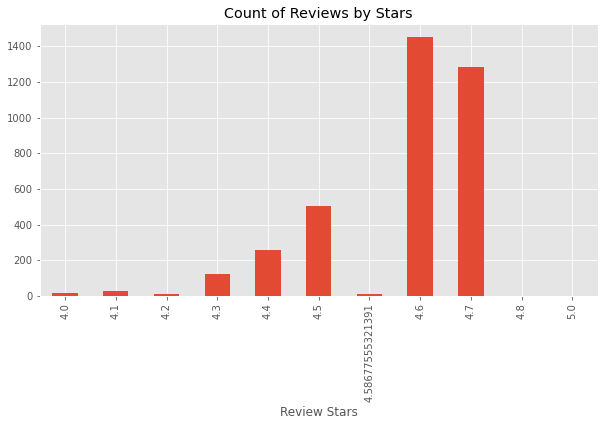

In [33]:
# ax = df['ratings'].value_counts().sort_index() \
#     .plot(kind='bar',
#           title='Count of Reviews by Ratings',
#           figsize=(10, 5))
# ax.set_xlabel('Review Stars')
# plt.show()

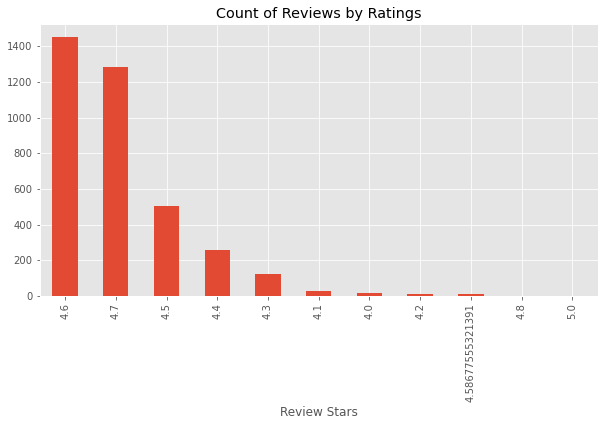

In [34]:
ax = df['ratings'].value_counts() \
    .plot(kind='bar',
          title='Count of Reviews by Ratings',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [30]:
print(df['ratings'].value_counts())

4.600000    1451
4.700000    1284
4.500000     504
4.400000     256
4.300000     122
4.100000      30
4.000000      19
4.200000       9
4.586776       8
4.800000       1
5.000000       1
Name: ratings, dtype: int64


In [31]:
constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {"type": "domain"}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=14),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints,
                                     line=dict(color='#DBE6EC', width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys().tolist(),
                         values=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=18),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=constraints)),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

categorical_variable_summary(df, 'ratings')


### Basic NLTK

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [59]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [61]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [239]:
example = df['contents'][100]
print(example)

The picture and color are too different. The photo is shown like khaki, but it is actually navy color.


In [240]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The',
 'picture',
 'and',
 'color',
 'are',
 'too',
 'different',
 '.',
 'The',
 'photo']

In [241]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('picture', 'NN'),
 ('and', 'CC'),
 ('color', 'NN'),
 ('are', 'VBP'),
 ('too', 'RB'),
 ('different', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('photo', 'NN')]

In [242]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  picture/NN
  and/CC
  color/NN
  are/VBP
  too/RB
  different/JJ
  ./.
  The/DT
  photo/NN
  is/VBZ
  shown/VBN
  like/IN
  khaki/NN
  ,/,
  but/CC
  it/PRP
  is/VBZ
  actually/RB
  navy/JJ
  color/NN
  ./.)


### (I) VADER Sentiment Scoring

By using NLTK's Sentiment Intensity Analyzer to get the neg/neu/pos scores of the text.
- This uses a "bag of words" approach:
  1. Stop words are removed
  2. Each word is scored and combined to a total score

In [37]:
# Download the lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [243]:
# Import the lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [244]:
sia.polarity_scores('My son loves it and wears it to scout camp')

{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}

Observation 1: The result shows that the sentence does not have any negative information (neg=0). It has higher neutral tones compared to positive (neu=0.709 and pos=0.291). However, the overall sentiment is positive because compound > 0.05

In [245]:
sia.polarity_scores('I really like it, great quality except it was too small. I had to return it.')

{'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.7996}

Observation 2: From here, the compound jumped to 0.7996, which makes the sentence more positive then the one from Observation 1

In [246]:
sia.polarity_scores('Rubbery bill! Low profile cap! Not a hunter cap!')

{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.4545}

Observation 3: The above sentence does not have any positive information (pos=0). It has some neutral and negative tones (neu=0.702 and neg=0.298). It has an extreme negative sentiment due to the compound score which is close to -1.

In [247]:
sia.polarity_scores('What a HORRIBLE hat. Fits horrible! Try it on and you’ll be returning it like me')

{'neg': 0.356, 'neu': 0.533, 'pos': 0.111, 'compound': -0.7597}

In [248]:
sia.polarity_scores('If you have small head it will fit perfectly 👍')

{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.7717}

In [249]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.1901}

In [250]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    contents = row['contents']
    index = row['index']
    result[index] = sia.polarity_scores(contents)

  0%|          | 0/3685 [00:00<?, ?it/s]

In [251]:
vaders = pd.DataFrame(result).T
vaders

,neg,neu,pos,compound
0,0.029,0.737,0.234,0.8473
1,0.051,0.677,0.272,0.7810
2,0.000,1.000,0.000,0.0000
3,0.000,0.446,0.554,0.7351
4,0.060,0.843,0.096,0.3716
...,...,...,...,...
3839,0.109,0.891,0.000,-0.2960
3840,0.000,0.000,1.000,0.7574
3841,0.021,0.682,0.297,0.9769
3842,0.060,0.800,0.140,0.6839


In [252]:
vaders['sentiment'] = vaders.idxmax(axis=1)
vaders

,neg,neu,pos,compound,sentiment
0,0.029,0.737,0.234,0.8473,compound
1,0.051,0.677,0.272,0.7810,compound
2,0.000,1.000,0.000,0.0000,neu
3,0.000,0.446,0.554,0.7351,compound
4,0.060,0.843,0.096,0.3716,neu
...,...,...,...,...,...
3839,0.109,0.891,0.000,-0.2960,neu
3840,0.000,0.000,1.000,0.7574,pos
3841,0.021,0.682,0.297,0.9769,compound
3842,0.060,0.800,0.140,0.6839,neu


In [253]:
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders

,index,neg,neu,pos,compound,sentiment
0,0,0.029,0.737,0.234,0.8473,compound
1,1,0.051,0.677,0.272,0.7810,compound
2,2,0.000,1.000,0.000,0.0000,neu
3,3,0.000,0.446,0.554,0.7351,compound
4,4,0.060,0.843,0.096,0.3716,neu
...,...,...,...,...,...,...
3680,3839,0.109,0.891,0.000,-0.2960,neu
3681,3840,0.000,0.000,1.000,0.7574,pos
3682,3841,0.021,0.682,0.297,0.9769,compound
3683,3842,0.060,0.800,0.140,0.6839,neu


In [254]:
vaders_new = vaders.merge(df)
vaders_new

,index,neg,neu,pos,compound,sentiment,name,price,reviewers,dates,ratings,titles,contents
0,0,0.029,0.737,0.234,0.8473,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,1,0.051,0.677,0.272,0.7810,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,2,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,3,0.000,0.446,0.554,0.7351,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,4,0.060,0.843,0.096,0.3716,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,3839,0.109,0.891,0.000,-0.2960,neu,THE NORTH FACE Class V Camp Mens Hat,$32.95,M. Goldstein,2022-11-16,4.4,Finally a hat that looks decent on me,so small. should be for children. no full grow...
3681,3840,0.000,0.000,1.000,0.7574,pos,THE NORTH FACE Class V Camp Mens Hat,$32.95,anonymous,2023-04-16,4.4,The North Face Logo is easily removed!!,Perfect fit!
3682,3841,0.021,0.682,0.297,0.9769,compound,THE NORTH FACE Class V Camp Mens Hat,$32.95,jeff gerhart,2022-09-30,4.4,this hat was way too small,I love this hat! I have a shaved head and glas...
3683,3842,0.060,0.800,0.140,0.6839,neu,THE NORTH FACE Class V Camp Mens Hat,$32.95,Maria,2023-05-24,4.4,Finally a hat that looks decent on me,Great Hat!\nThe North Face logo label on the f...


In [255]:
# These are the sentiment score and metadata
vaders_new.head(10)

,index,neg,neu,pos,compound,sentiment,name,price,reviewers,dates,ratings,titles,contents
0,0,0.029,0.737,0.234,0.8473,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,1,0.051,0.677,0.272,0.7810,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,2,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,3,0.000,0.446,0.554,0.7351,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,4,0.060,0.843,0.096,0.3716,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,5,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
6,6,0.000,0.771,0.229,0.8910,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
7,7,0.000,0.752,0.248,0.6476,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,8,0.000,0.627,0.373,0.8080,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,2023-02-27,4.6,as expected,very lightweight weatherproof shell. the mater...
9,9,0.111,0.785,0.104,0.1882,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...


Plot VADER results

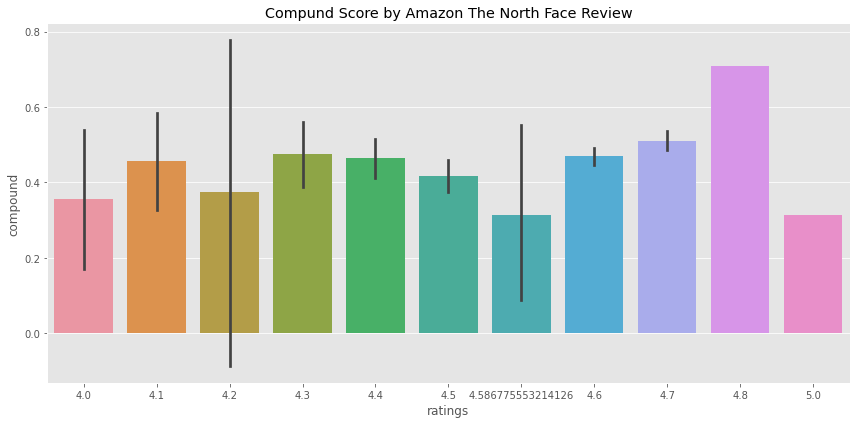

In [256]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=vaders_new, x='ratings', y='compound')
ax.set_title('Compund Score by Amazon The North Face Review')
plt.tight_layout()
plt.show()

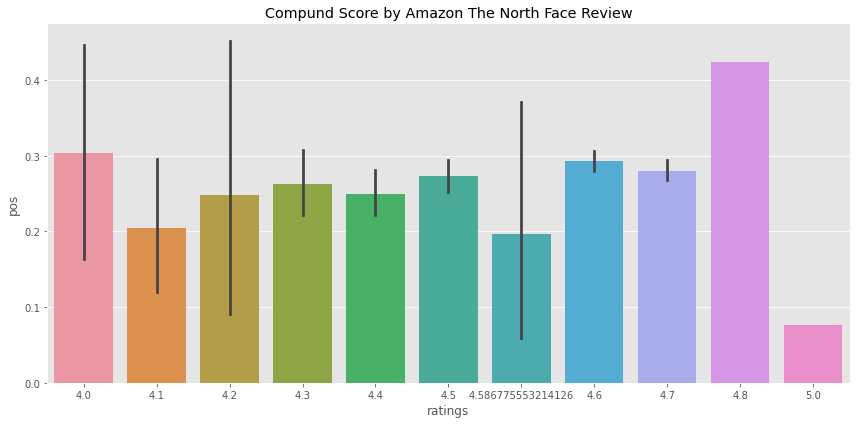

In [257]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=vaders_new, x='ratings', y='pos')
ax.set_title('Compund Score by Amazon The North Face Review')
plt.tight_layout()
plt.show()

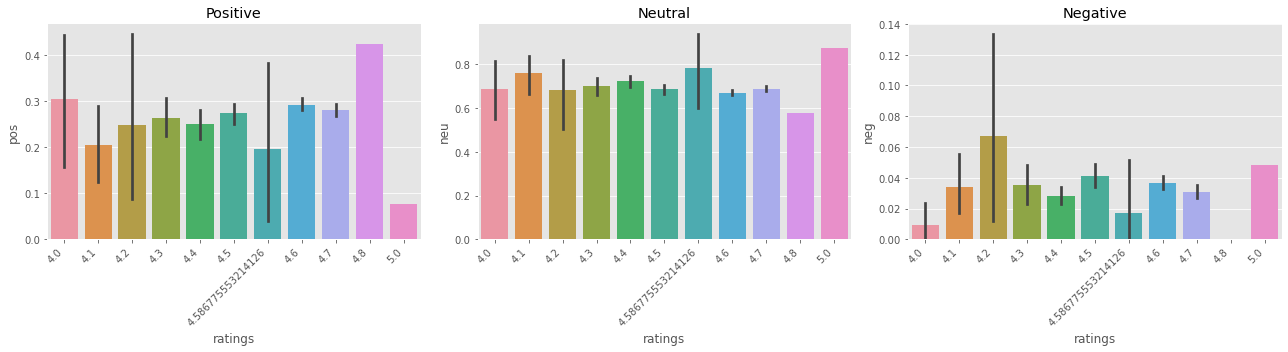

In [258]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(data=vaders_new, x='ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders_new, x='ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders_new, x='ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

I) From the above graph, it is not directly proportional whereby the higher the ratings, the more positive the review are. 

II) Upon checking the dataset it is observed that for some of the reviews, it has a high ratings but with a negative comments.

III) Hence, the ratings is not directly proportional to the contents.


In [259]:
def format_data(vaders_new):
    last_col = str(vaders.columns[-1])
    first_col = str(vaders.columns[0])

    vaders_new.rename(columns={last_col: 'contents', first_col: 'polarity'}, inplace=True)

    # Change the ratings to negative, neutral, and positive
    conditions = [
        vaders_new['ratings'] < 4.3,
        (vaders_new['ratings'] >= 4.3) & (vaders_new['ratings'] <= 4.6),
        vaders_new['ratings'] > 4.6
    ]
    labels = ['negative', 'neutral', 'positive']

    vaders_new['polarity'] = np.select(conditions, labels)

    # Get only the two columns
    return vaders_new[['contents', 'polarity']]

# Apply the transformation
vaders_new_polarity = format_data(df)
vaders_new_polarity.head(10)

,contents,polarity
0,This is a must have if you are in a rainy area...,neutral
1,"very wet rainy season this year, so had ample ...",neutral
2,"Cómoda , resiste el frío y el agua",neutral
3,Fits well and great materials and construction,neutral
4,I am replacing the original venture jacket. Th...,neutral
5,Color inside. Pockets,neutral
6,The jacket looks to be well made and did a gre...,neutral
7,Exactly what I ordered! The product is outstan...,neutral
8,very lightweight weatherproof shell. the mater...,neutral
9,You're definitly only paying for the name. The...,neutral


In [260]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sia.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
vaders_new_polarity["vader_prediction"] = vaders_new_polarity["contents"].apply(predict_sentiment)

# Show 10 random rows of the data
vaders_new_polarity.head(10)

,contents,polarity,vader_prediction
0,This is a must have if you are in a rainy area...,neutral,positive
1,"very wet rainy season this year, so had ample ...",neutral,positive
2,"Cómoda , resiste el frío y el agua",neutral,neutral
3,Fits well and great materials and construction,neutral,positive
4,I am replacing the original venture jacket. Th...,neutral,positive
5,Color inside. Pockets,neutral,neutral
6,The jacket looks to be well made and did a gre...,neutral,positive
7,Exactly what I ordered! The product is outstan...,neutral,positive
8,very lightweight weatherproof shell. the mater...,neutral,positive
9,You're definitly only paying for the name. The...,neutral,positive


### To generate the performance (precision, recall and f1 score)

In [261]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(vaders_new_polarity['polarity'], vaders_new_polarity['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(vaders_new_polarity['polarity'], vaders_new_polarity['vader_prediction']))

Accuracy: 0.3603799185888738

              precision    recall  f1-score   support

    negative       0.01      0.09      0.02        58
     neutral       0.62      0.14      0.23      2341
    positive       0.36      0.78      0.49      1286

    accuracy                           0.36      3685
   macro avg       0.33      0.33      0.25      3685
weighted avg       0.52      0.36      0.32      3685



I) The accuracy is low which is 0.36, meaning the polarity is not accurate as some of the bad reviews have high ratings.

II) This might due to the reason that the reviewers want their comments to be at the top of the reviews, so that it is more noticeable.

III) In order to remove the "faulty" data, reviews with high ratings but low compounds score are required to be filtered out.

In [262]:
# To extract data with high ratings but low compound score
high_ratings_low_compound = vaders_new[(vaders_new['ratings'] > 4.5) & (vaders_new['compound'] < 0.2)]
high_ratings_low_compound

,index,neg,neu,pos,compound,sentiment,name,price,reviewers,dates,ratings,titles,contents
2,2,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
5,5,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
9,9,0.111,0.785,0.104,0.1882,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...
14,15,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Garment,Color inside. Pockets
18,19,0.111,0.785,0.104,0.1882,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,3773,0.356,0.533,0.111,-0.7597,neu,THE NORTH FACE Mudder Trucker Mens Cap,$31.95,Wade K.,2023-04-19,4.6,What a HORRIBLE hat. Fits horrible! Try it on ...,What a HORRIBLE hat. Fits horrible! Try it on ...
3621,3775,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Mudder Trucker Mens Cap,$31.95,gina inscore,2023-05-17,4.6,Great hat!,Excelente muy buena calidad
3622,3776,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Mudder Trucker Mens Cap,$31.95,David,2023-02-13,4.6,Nice,Es tal cual la imagen de la tienda. Gracias
3629,3783,0.000,1.000,0.000,0.0000,neu,THE NORTH FACE Mudder Trucker Mens Cap,$31.95,espacios,2023-04-22,4.6,"Fits great, looks great & true to size",Es excelente me encanto


In [263]:
total_rows = 3685
faulty_rows = 700

proportion_faulty = (faulty_rows / total_rows) * 100
proportion_faulty

18.99592944369064

I) It is about 19% of faulty data

In [264]:
# To remove the faulty data
vaders_new_final = vaders_new.drop(vaders[(vaders_new['ratings'] > 4.5) & (vaders_new['compound'] < 0.2)].index)
vaders_new_final

,index,neg,neu,pos,compound,sentiment,name,price,reviewers,dates,ratings,titles,contents
0,0,0.029,0.737,0.234,0.8473,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,1,0.051,0.677,0.272,0.7810,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
3,3,0.000,0.446,0.554,0.7351,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,4,0.060,0.843,0.096,0.3716,neu,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
6,6,0.000,0.771,0.229,0.8910,compound,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,3839,0.109,0.891,0.000,-0.2960,neu,THE NORTH FACE Class V Camp Mens Hat,$32.95,M. Goldstein,2022-11-16,4.4,Finally a hat that looks decent on me,so small. should be for children. no full grow...
3681,3840,0.000,0.000,1.000,0.7574,pos,THE NORTH FACE Class V Camp Mens Hat,$32.95,anonymous,2023-04-16,4.4,The North Face Logo is easily removed!!,Perfect fit!
3682,3841,0.021,0.682,0.297,0.9769,compound,THE NORTH FACE Class V Camp Mens Hat,$32.95,jeff gerhart,2022-09-30,4.4,this hat was way too small,I love this hat! I have a shaved head and glas...
3683,3842,0.060,0.800,0.140,0.6839,neu,THE NORTH FACE Class V Camp Mens Hat,$32.95,Maria,2023-05-24,4.4,Finally a hat that looks decent on me,Great Hat!\nThe North Face logo label on the f...


In [265]:
def format_data(vaders):
    last_col = str(vaders_new_final.columns[-1])
    first_col = str(vaders_new_final.columns[0])

    vaders_new_final.rename(columns={last_col: 'contents', first_col: 'polarity'}, inplace=True)

    # Change the ratings to negative, neutral, and positive
    conditions = [
        vaders_new_final['ratings'] < 4.3,
        (vaders_new_final['ratings'] >= 4.3) & (vaders_new_final['ratings'] <= 4.6),
        vaders_new_final['ratings'] > 4.6
    ]
    labels = ['negative', 'neutral', 'positive']

    vaders_new_final['polarity'] = np.select(conditions, labels)

    # Get only the two columns
    return vaders_new_final[['contents', 'polarity']]

# Apply the transformation
vaders_new_final_polarity = format_data(df)
vaders_new_final_polarity.head(10)

,contents,polarity
0,This is a must have if you are in a rainy area...,neutral
1,"very wet rainy season this year, so had ample ...",neutral
3,Fits well and great materials and construction,neutral
4,I am replacing the original venture jacket. Th...,neutral
6,The jacket looks to be well made and did a gre...,neutral
7,Exactly what I ordered! The product is outstan...,neutral
8,very lightweight weatherproof shell. the mater...,neutral
10,This is a must have if you are in a rainy area...,neutral
11,"very wet rainy season this year, so had ample ...",neutral
12,Fits well and great materials and construction,neutral


In [267]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sia.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
vaders_new_final_polarity["vader_prediction"] = vaders_new_final_polarity["contents"].apply(predict_sentiment)

# Show 10 random rows of the data
vaders_new_final_polarity.head(10)

,contents,polarity,vader_prediction
0,This is a must have if you are in a rainy area...,neutral,positive
1,"very wet rainy season this year, so had ample ...",neutral,positive
3,Fits well and great materials and construction,neutral,positive
4,I am replacing the original venture jacket. Th...,neutral,positive
6,The jacket looks to be well made and did a gre...,neutral,positive
7,Exactly what I ordered! The product is outstan...,neutral,positive
8,very lightweight weatherproof shell. the mater...,neutral,positive
10,This is a must have if you are in a rainy area...,neutral,positive
11,"very wet rainy season this year, so had ample ...",neutral,positive
12,Fits well and great materials and construction,neutral,positive


In [268]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(vaders_new_final_polarity['polarity'], vaders_new_final_polarity['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(vaders_new_final_polarity['polarity'], vaders_new_final_polarity['vader_prediction']))

Accuracy: 0.37152428810720267

              precision    recall  f1-score   support

    negative       0.04      0.09      0.06        58
     neutral       0.89      0.07      0.12      1950
    positive       0.36      1.00      0.53       977

    accuracy                           0.37      2985
   macro avg       0.43      0.38      0.24      2985
weighted avg       0.70      0.37      0.25      2985

